In [5]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Load and convert image to grayscale
image = cv2.imread('images/example-image.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')
plt.show()

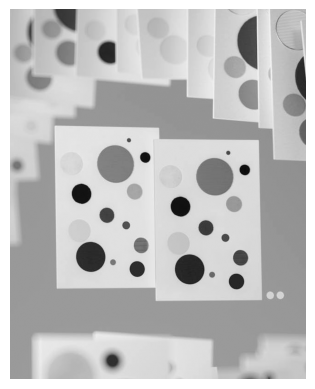

In [ ]:
# Initialize SIFT detector and detect keypoints
sift = cv2.SIFT_create()
keypoints = sift.detect(gray_image, None)

# Print all tunable SIFT parameters with their default values
print("SIFT Tunable Parameters (Default Values):")
print(f"  contrastThreshold: {sift.getContrastThreshold():.3f} (range: 0.01-0.1)")
print(f"  edgeThreshold: {sift.getEdgeThreshold():.1f} (range: 5-20)")
print(f"  nfeatures: {sift.getMaxFeatures()} (0 = unlimited)")
print(f"  nOctaveLayers: {sift.getNOctaveLayers()} (typical: 3)")
print(f"  sigma: {sift.getSigma():.2f} (Gaussian blur for base image)")
print(f"Detected {len(keypoints)} keypoints")

# Show keypoint structure example
if keypoints:
    kp = keypoints[0]
    print(f"First keypoint: pos=({kp.pt[0]:.1f}, {kp.pt[1]:.1f}), size={kp.size:.1f}, angle={kp.angle:.1f}°")

SIFT Detector Parameters:
Contrast Threshold: 0.04
Edge Threshold: 10.0
Number of Features: 0
Number of Octave Layers: 3
Sigma: 1.6

Parameter Ranges:
- contrastThreshold: typically 0.03-0.1 (default: 0.04)
- edgeThreshold: typically 5-20 (default: 10)
- nfeatures: maximum number of features to retain (default: 0 = unlimited)
- nOctaveLayers: number of layers in each octave (default: 3)
- sigma: sigma of the Gaussian applied to the input image (default: 1.6)



Number of keypoints detected: 384

Keypoint structure exploration:
Keypoint coordinates (x, y): (25.06, 96.47)
Size (scale): 22.16
Angle (orientation): 29.37 degrees
Response (strength): 0.018905
Octave: 14615042
Class ID: -1

First 5 keypoints:
  Keypoint 1: pos=(25.1, 96.5), size=22.2, angle=29.4°
  Keypoint 2: pos=(25.1, 96.5), size=22.2, angle=96.8°
  Keypoint 3: pos=(25.1, 96.5), size=22.2, angle=247.1°
  Keypoint 4: pos=(28.5, 385.5), size=21.0, angle=256.6°
  Keypoint 5: pos=(29.5, 65.2), size=12.5, angle=170.6°


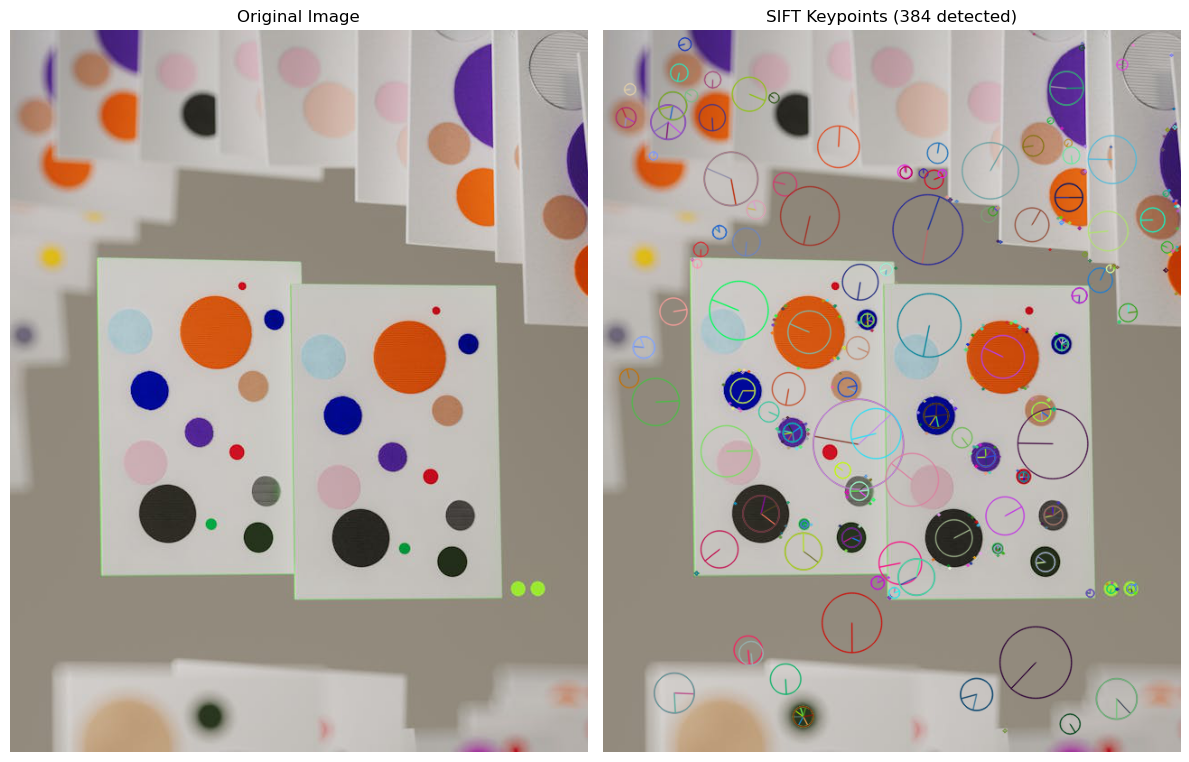

In [ ]:
# Visualize keypoints and analyze scales
import numpy as np

output_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
sizes = [kp.size for kp in keypoints]

plt.figure(figsize=(15, 5))

# Original vs keypoints
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT Keypoints ({len(keypoints)} detected)')
plt.axis('off')

# Scale histogram
plt.subplot(1, 3, 3)
plt.hist(sizes, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Keypoint Size (Scale)')
plt.ylabel('Frequency')
plt.title('Scale Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Scale stats: min={min(sizes):.1f}, max={max(sizes):.1f}, mean={np.mean(sizes):.1f}")

Scale statistics:
  Min scale: 1.80
  Max scale: 99.93
  Mean scale: 14.40
  Std scale: 17.18


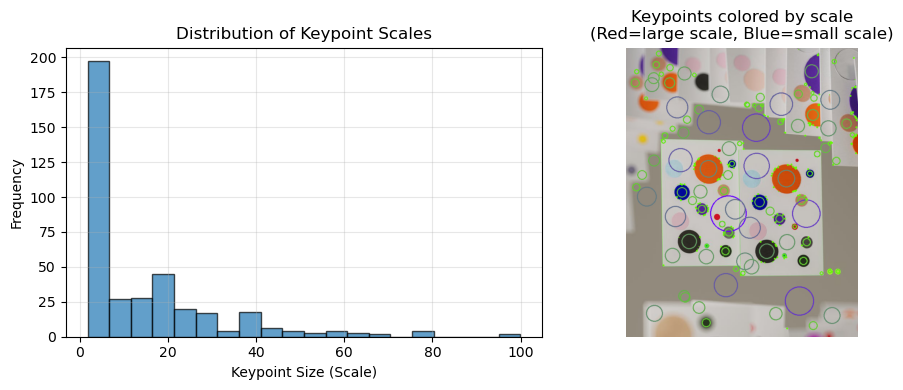

# Parameter tuning for optimal blob detection
parameter_sets = [
    {"contrastThreshold": 0.04, "edgeThreshold": 10, "name": "Default"},
    {"contrastThreshold": 0.02, "edgeThreshold": 10, "name": "Lower Contrast"},
    {"contrastThreshold": 0.08, "edgeThreshold": 10, "name": "Higher Contrast"},
    {"contrastThreshold": 0.04, "edgeThreshold": 20, "name": "Higher Edge"},
]

# Test parameter sets and find best
results = []
for params in parameter_sets:
    sift_test = cv2.SIFT_create(contrastThreshold=params["contrastThreshold"], 
                               edgeThreshold=params["edgeThreshold"])
    kpts = sift_test.detect(gray_image, None)
    results.append({"name": params["name"], "params": params, "keypoints": kpts, "count": len(kpts)})
    print(f"{params['name']}: {len(kpts)} keypoints")

# Find best result (most keypoints for circle detection)
best_result = max(results, key=lambda x: x['count'])
print(f"\nBest for circle detection: {best_result['name']} with {best_result['count']} keypoints")

Default: 384 keypoints detected
Lower Contrast: 494 keypoints detected
Higher Contrast: 179 keypoints detected
Lower Edge: 240 keypoints detected
Higher Edge: 585 keypoints detected
Circle Optimized: 596 keypoints detected

Parameter comparison:
  Default: 384 keypoints
    Contrast: 0.04, Edge: 10
  Lower Contrast: 494 keypoints
    Contrast: 0.02, Edge: 10
  Higher Contrast: 179 keypoints
    Contrast: 0.08, Edge: 10
  Lower Edge: 240 keypoints
    Contrast: 0.04, Edge: 5
  Higher Edge: 585 keypoints
    Contrast: 0.04, Edge: 20
  Circle Optimized: 596 keypoints
    Contrast: 0.025, Edge: 15
Higher Edge: 585 keypoints detected
Circle Optimized: 596 keypoints detected

Parameter comparison:
  Default: 384 keypoints
    Contrast: 0.04, Edge: 10
  Lower Contrast: 494 keypoints
    Contrast: 0.02, Edge: 10
  Higher Contrast: 179 keypoints
    Contrast: 0.08, Edge: 10
  Lower Edge: 240 keypoints
    Contrast: 0.04, Edge: 5
  Higher Edge: 585 keypoints
    Contrast: 0.04, Edge: 20
  Circle

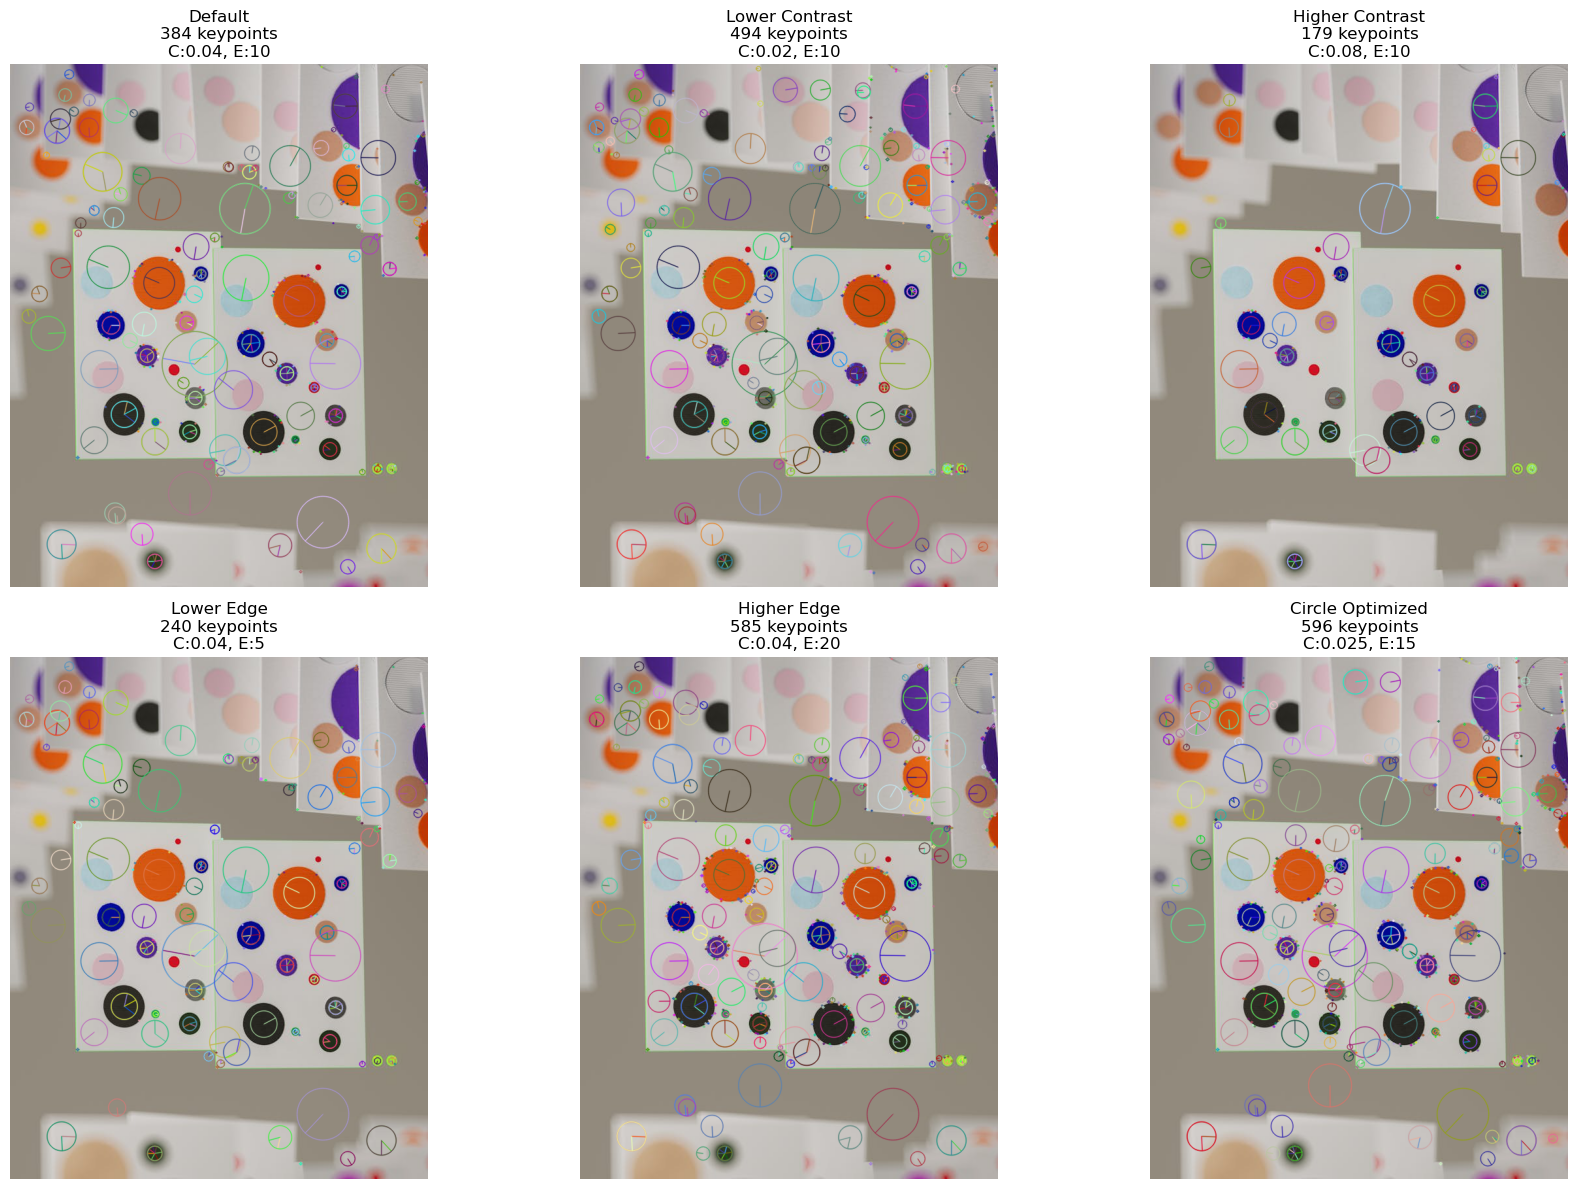

In [ ]:
# Visualize parameter comparison results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, result in enumerate(results):
    row, col = i // 2, i % 2
    output_img = cv2.drawKeypoints(image, result['keypoints'], None, 
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    axes[row, col].imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"{result['name']}\n{result['count']} keypoints")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show parameter effect analysis
counts = [r['count'] for r in results]
names = [r['name'] for r in results]

plt.figure(figsize=(10, 4))
plt.bar(range(len(names)), counts, color='skyblue', edgecolor='navy')
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.ylabel('Number of Keypoints')
plt.title('Parameter Sets Comparison')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Quality Analysis for Each Parameter Set:

Default:
  Total keypoints: 384
  Average response (strength): 0.036923
  Response std: 0.027878
  Min response: 0.013398
  Max response: 0.117570
  Average scale: 14.40
  Scale range: 1.80 - 99.93
  Strong keypoints (>median): 192 (50.0%)

Lower Contrast:
  Total keypoints: 494
  Average response (strength): 0.030881
  Response std: 0.027064
  Min response: 0.006757
  Max response: 0.117570
  Average scale: 12.47
  Scale range: 1.80 - 99.93
  Strong keypoints (>median): 247 (50.0%)

Higher Contrast:
  Total keypoints: 179
  Average response (strength): 0.056829
  Response std: 0.030139
  Min response: 0.026708
  Max response: 0.117570
  Average scale: 15.62
  Scale range: 1.81 - 77.43
  Strong keypoints (>median): 89 (49.7%)

Lower Edge:
  Total keypoints: 240
  Average response (strength): 0.043297
  Response std: 0.032788
  Min response: 0.013459
  Max response: 0.117570
  Average scale: 19.28
  Scale range: 1.83 - 99.93
  Strong keypoints (

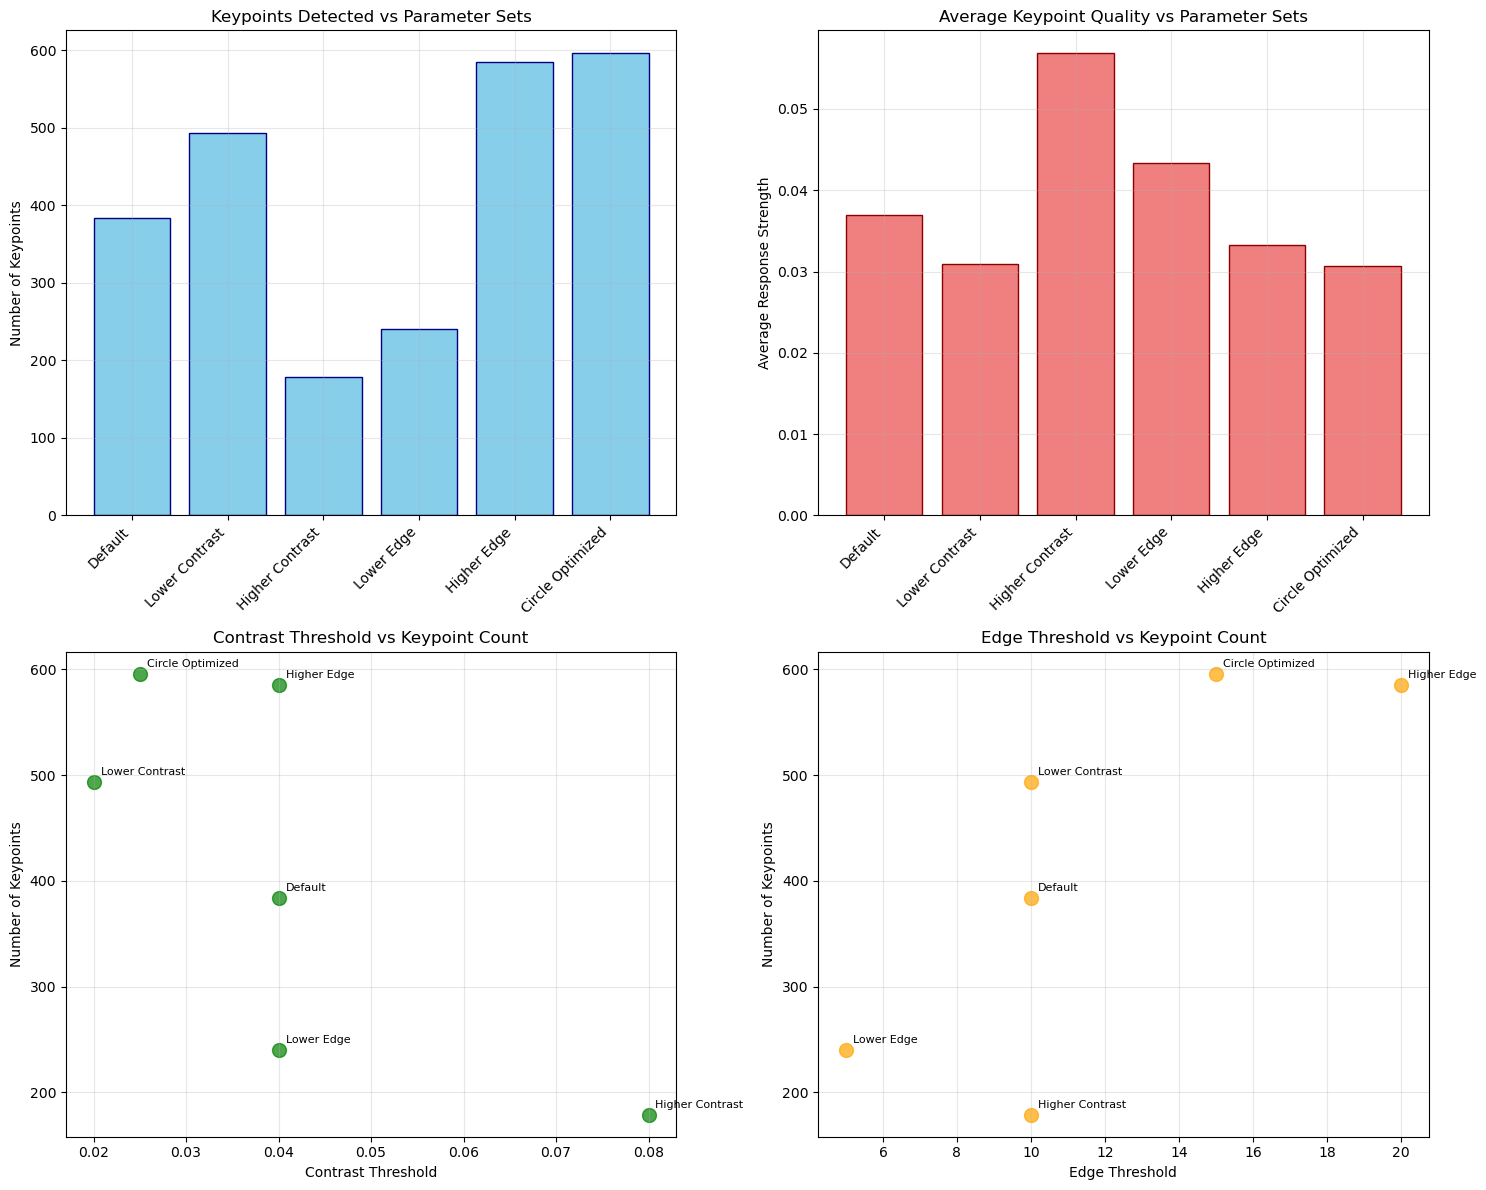

Recommendation for Circle Detection:
Default: Score = 0.646 (Count: 384, Avg Response: 0.036923)
Lower Contrast: Score = 0.743 (Count: 494, Avg Response: 0.030881)
Higher Contrast: Score = 0.510 (Count: 179, Avg Response: 0.056829)
Lower Edge: Score = 0.510 (Count: 240, Avg Response: 0.043297)
Higher Edge: Score = 0.862 (Count: 585, Avg Response: 0.033207)
Circle Optimized: Score = 0.862 (Count: 596, Avg Response: 0.030681)

Best parameter set for circle detection: Higher Edge
  Contrast Threshold: 0.04
  Edge Threshold: 20
  Keypoints detected: 585


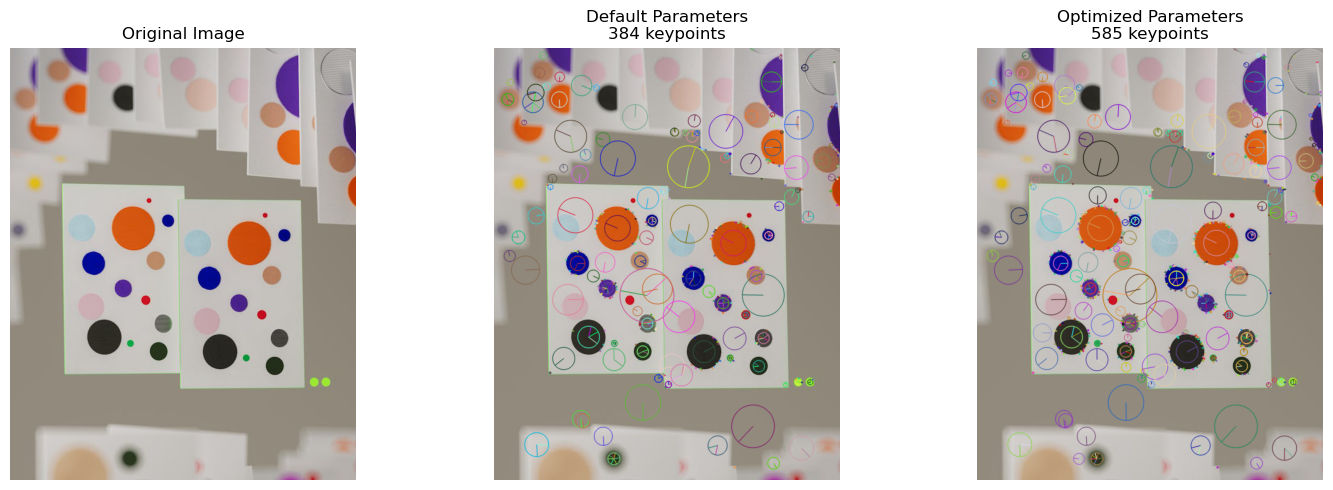